In [2]:
import requests
import json
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jalon 1, 2 ,3
Notre projet portera sur le jeu League of Legends. C’est un jeu d’équipe en ligne
en 5 contre 5. Vous pouvez si vous le souhaitez regarder un tutoriel de 3 minutes
si vous avez envie de vous familiariser avec le jeu pour avoir une meilleure
compréhension globale sur le thème de notre projet.
https://www.youtube.com/watch?v=0MEOdboHk8o&ab_channel=GentleMates

# 1 - Collection de notre jeu de données

Pour collecter nos données, nous sommes directement allés les chercher à la source en se branchant à l’api du jeu. On y récupère les noms des meilleurs joueurs du serveur européen. On fait ce choix car ces parties de haut niveaux sont moins hasardeuses et il en découlera des données plus fiables.

Il faut aussi prendre en compte les restrictions de l’api concernant le nombre de requêtes, on a pour cela créé plusieurs comptes particuliers afin de faire des requêtes en parrallèles sur plus de comptes.

Nous avons séparé tout le processus de requêtes api dans le fichier api_process. Ce fichier contiendra le code en rapport direct avec les jalons et le rendu final du projet.

# Update depuis le jalon 2 : 
Même si nous en avions l'intuition, prédire l'issue d'une partie en prenant ses caractéristiques à l'instant final de la partie était trop simple (environ 1 d'accuracy dès la régression logistique en cross validation).

On revoit donc tout le dataset pour prendre des informations à un instant t (exemple ici : 15 minutes) de la partie pour en prédire son issue. On aura donc des résultats plus pertinents avec une vraie utilité avec un peu plus de challenge.

Le processus de récolte de données, de filtrage des parties de moins de 15 minutes etc.. est disponible dans le notebook api_processs. 

On a gardé une trace de nos anciennes accuracys dans le fichier accuracy_with_single_feature.txt.

# Update Jalon 3 :

Comme on s'était planté pour le jalon 2, on a refait la phase de gridSearchCV. 


In [3]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']
data.drop(columns='winningTeam', inplace=True)

In [3]:
data

,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,Team1.championStats.ccReduction,...,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.participantId,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
0,0,177,352,0,0,628,817,0,0,71,...,50,100,47,421,40,58227,25880,1049805,24603,29860
1,0,185,446,0,0,551,618,0,0,0,...,50,95,46,402,40,44645,41057,395210,27729,30281
2,0,186,466,0,0,603,826,0,0,30,...,50,104,49,389,40,39313,27933,730043,31166,31966
3,0,195,307,0,0,746,945,0,0,30,...,50,107,48,385,40,43743,50106,957390,30368,32863
4,0,230,348,0,30,759,635,0,0,67,...,50,83,46,370,40,49966,24051,725235,28765,29713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0,334,307,0,0,867,512,0,0,19,...,50,90,46,369,40,50322,38622,850247,25296,29973
9814,0,225,362,0,0,664,692,0,0,18,...,50,101,47,366,40,42486,54985,568203,29257,30016
9815,0,456,380,0,0,817,818,0,0,0,...,50,76,42,352,40,58954,56762,152030,27287,25950
9816,0,188,393,0,0,651,798,0,0,10,...,50,88,47,325,40,15059,48839,452886,28472,30051


In [4]:
data.describe()

,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,Team1.championStats.ccReduction,...,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.participantId,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
count,9818.0,9818.000000,9818.000000,9818.0,9818.000000,9818.000000,9818.000000,9818.0,9818.0,9818.000000,...,9818.000000,9818.000000,9818.000000,9818.000000,9818.0,9818.000000,9818.000000,9.818000e+03,9818.000000,9818.000000
mean,0.0,235.988389,367.605419,0.0,1.377776,633.077205,750.664799,0.0,0.0,23.865349,...,50.113058,90.010084,46.502852,374.196781,40.0,41672.416684,41267.525362,6.769378e+05,28501.359034,29922.642493
std,0.0,102.364094,51.235050,0.0,5.749763,80.809331,85.775827,0.0,0.0,24.537527,...,2.596306,13.956451,1.798736,31.125968,0.0,9094.067431,8856.881988,2.884957e+05,2707.187491,1882.298691
min,0.0,0.000000,263.000000,0.0,0.000000,410.000000,512.000000,0.0,0.0,-30.000000,...,0.000000,10.000000,36.000000,241.000000,40.0,6958.000000,8897.000000,8.843100e+04,18351.000000,19771.000000
25%,0.0,161.000000,331.000000,0.0,0.000000,575.000000,690.000000,0.0,0.0,0.000000,...,50.000000,80.000000,45.000000,354.000000,40.0,35836.500000,35486.500000,4.883540e+05,26628.250000,28712.250000
50%,0.0,222.000000,360.000000,0.0,0.000000,628.000000,740.000000,0.0,0.0,19.000000,...,50.000000,90.000000,47.000000,376.000000,40.0,42054.000000,41323.000000,6.306030e+05,28337.500000,29947.000000
75%,0.0,299.000000,395.000000,0.0,0.000000,683.000000,799.000000,0.0,0.0,37.000000,...,50.000000,99.000000,48.000000,396.000000,40.0,47925.000000,47230.750000,7.983498e+05,30257.750000,31159.000000
max,0.0,776.000000,726.000000,0.0,48.000000,1092.000000,1283.000000,0.0,0.0,157.000000,...,100.000000,143.000000,53.000000,475.000000,40.0,71511.000000,71244.000000,3.875968e+06,40211.000000,37041.000000


In [5]:
target

0       1
1       1
2       1
3       0
4       1
       ..
9813    1
9814    1
9815    0
9816    1
9817    0
Name: winningTeam, Length: 9818, dtype: int64

In [6]:
#count nan
data.isnull().sum().any()


False

In [7]:
target.isnull().sum().any()

False

# Visualisation du dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [9]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']

In [10]:
target

0       1
1       1
2       1
3       0
4       1
       ..
9813    1
9814    1
9815    0
9816    1
9817    0
Name: winningTeam, Length: 9818, dtype: int64

# Histogrammes 

In [ ]:
#We take the first half of the dataset to display variables distribution with seaborn
#display the distribution of the variables
def display_distributions(data):
    data = shuffle(data)
    for column in data.columns:
        if column != 'winningTeam':
            sns.displot(data, x=column, hue='winningTeam')
            plt.title(column)
            plt.show()

display_distributions(data)

In [11]:
to_remove = ['Team1.championStats.armorPen','Team1.championStats.abilityHaste', 'Team1.championStats.armorPenPercent', 'Team1.championStats.bonusArmorPenPercent', 'Team1.championStats.bonusMagicPenPercent', 'Team1.championStats.cooldownReduction', 'Team1.championStats.physicalVamp', 'Team1.participantId', 'Team2.championStats.armorPen', 'Team2.championStats.abilityHaste', 'Team2.championStats.armorPenPercent', 'Team2.championStats.bonusArmorPenPercent', 'Team2.championStats.bonusMagicPenPercent', 'Team2.championStats.cooldownReduction', 'Team2.championStats.physicalVamp', 'Team2.participantId']
shape1 = data.shape
print("Shape before deleting useless columns : ", data.shape)

data = data.drop(columns=to_remove, errors='ignore')
shape2 = data.shape

if shape1 == shape2:
    print("No columns were deleted")
else :
    print("Shape after deleting useless columns : ", data.shape)


Shape before deleting useless columns :  (9818, 97)
Shape after deleting useless columns :  (9818, 81)


In [12]:
data.describe()

,winningTeam,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.ccReduction,Team1.championStats.health,Team1.championStats.healthMax,Team1.championStats.healthRegen,Team1.championStats.lifesteal,...,Team2.damageStats.trueDamageTaken,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
count,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.00000,9818.000000,...,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9.818000e+03,9818.000000,9818.000000
mean,0.553982,235.988389,367.605419,633.077205,750.664799,23.865349,6677.439906,8685.072214,191.54288,9.105826,...,1369.947138,50.113058,90.010084,46.502852,374.196781,41672.416684,41267.525362,6.769378e+05,28501.359034,29922.642493
std,0.497103,102.364094,51.235050,80.809331,85.775827,24.537527,1626.682522,594.400115,87.66935,6.186328,...,1036.203035,2.596306,13.956451,1.798736,31.125968,9094.067431,8856.881988,2.884957e+05,2707.187491,1882.298691
min,0.000000,0.000000,263.000000,410.000000,512.000000,-30.000000,0.000000,6511.000000,82.00000,0.000000,...,0.000000,0.000000,10.000000,36.000000,241.000000,6958.000000,8897.000000,8.843100e+04,18351.000000,19771.000000
25%,0.000000,161.000000,331.000000,575.000000,690.000000,0.000000,5674.000000,8270.000000,122.00000,5.000000,...,646.000000,50.000000,80.000000,45.000000,354.000000,35836.500000,35486.500000,4.883540e+05,26628.250000,28712.250000
50%,1.000000,222.000000,360.000000,628.000000,740.000000,19.000000,6882.000000,8646.000000,169.00000,8.000000,...,1070.000000,50.000000,90.000000,47.000000,376.000000,42054.000000,41323.000000,6.306030e+05,28337.500000,29947.000000
75%,1.000000,299.000000,395.000000,683.000000,799.000000,37.000000,7922.000000,9063.750000,234.00000,11.000000,...,1823.000000,50.000000,99.000000,48.000000,396.000000,47925.000000,47230.750000,7.983498e+05,30257.750000,31159.000000
max,1.000000,776.000000,726.000000,1092.000000,1283.000000,157.000000,10846.000000,11605.000000,1510.00000,108.000000,...,9687.000000,100.000000,143.000000,53.000000,475.000000,71511.000000,71244.000000,3.875968e+06,40211.000000,37041.000000


In [14]:
def plot_custom_graph(title, data_sample, col , xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.scatter(data_sample["Team1."+col], data_sample["Team2."+col], c=data_sample["winningTeam"], cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['Blue team wins', 'Red team wins']) 
    plt.show()


# Graphs

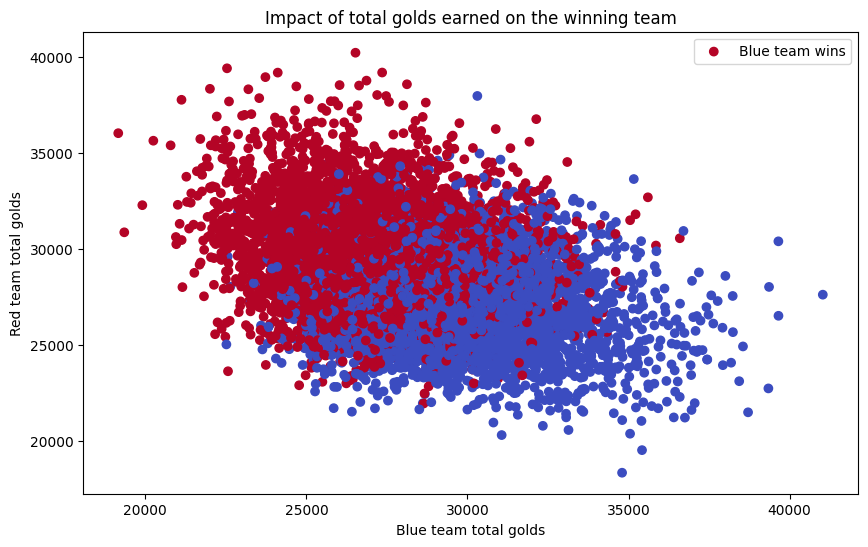

In [15]:
#Impact of total golds earned on the winning team
plot_custom_graph('Impact of total golds earned on the winning team', data, 'totalGold', 'Blue team total golds', 'Red team total golds')

League of legends is game heavily influenced by golds as this graph shows.

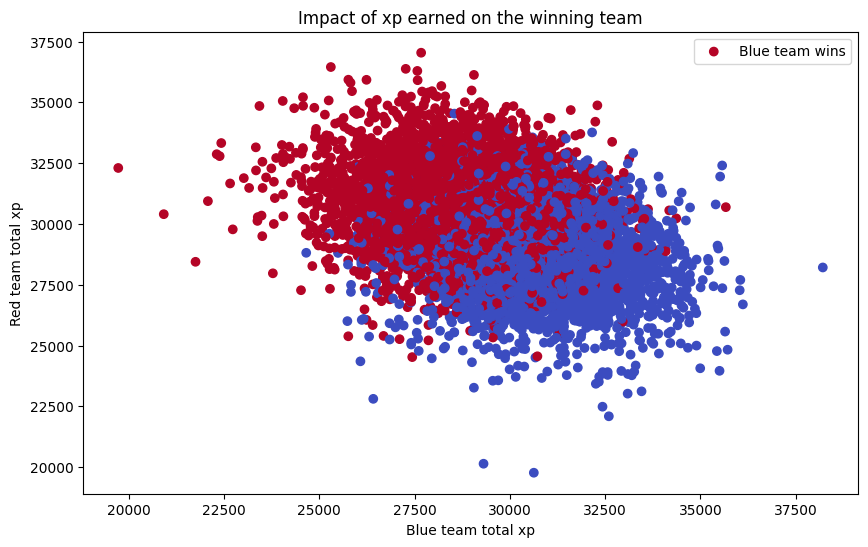

In [16]:
#Impact of total xp earned on the winning team
plot_custom_graph('Impact of xp earned on the winning team', data, 'xp', 'Blue team total xp', 'Red team total xp')

It seems that the experience points earned is important 

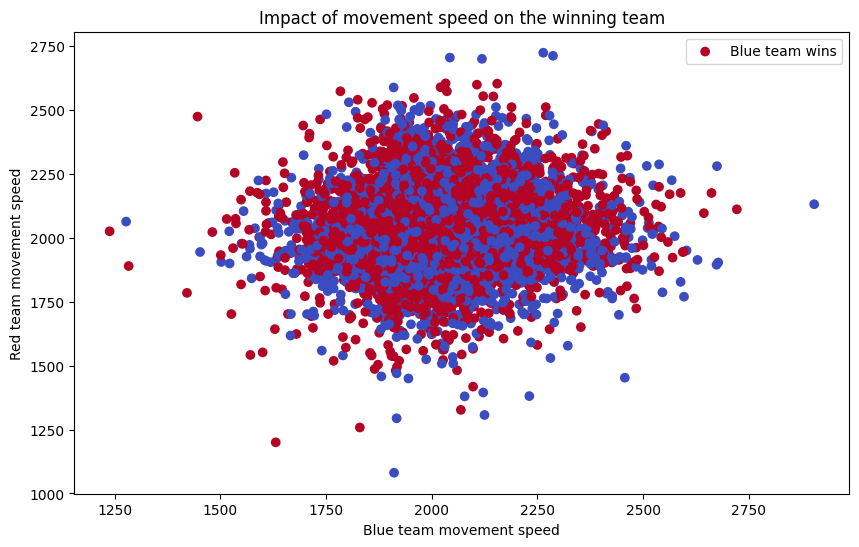

In [17]:
plot_custom_graph('Impact of movement speed on the winning team', data, 'championStats.movementSpeed', 'Blue team movement speed', 'Red team movement speed')

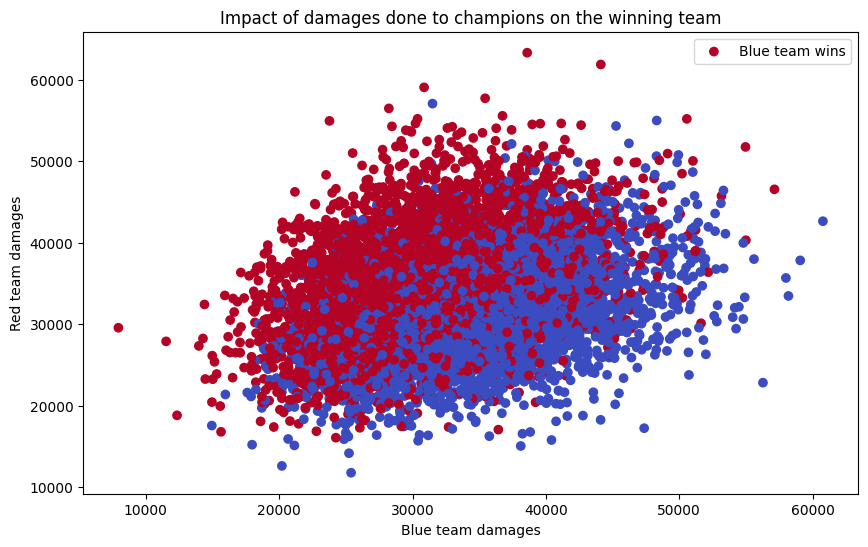

In [18]:
plot_custom_graph('Impact of damages done to champions on the winning team', data, 'damageStats.totalDamageDoneToChampions', 'Blue team damages', 'Red team damages')

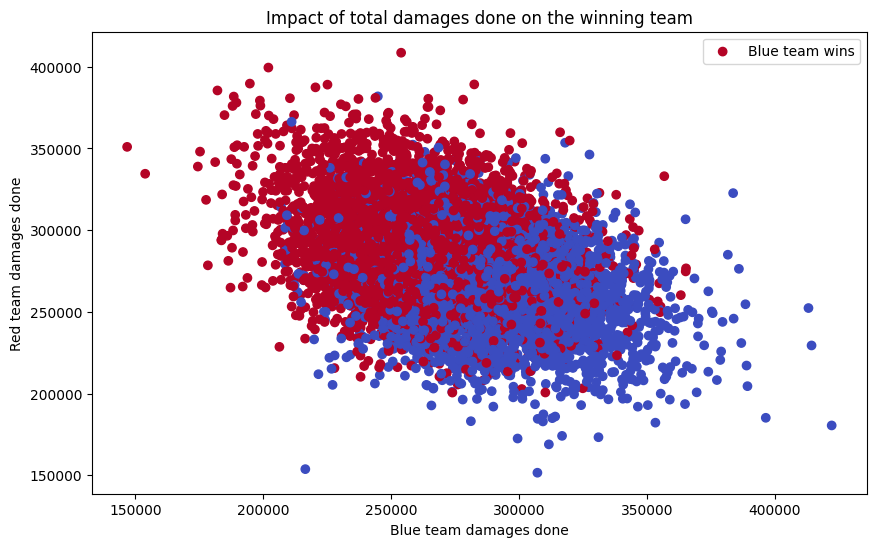

In [19]:
plot_custom_graph('Impact of total damages done on the winning team', data, 'damageStats.totalDamageDone', 'Blue team damages done', 'Red team damages done')

# Jalon 2

Nous voulons faire une régression logistique pénalisée.

Ce choix se justifie car nous cherchons à prédire une variable qualitative binaire.

Pour les hyperparamètres, nous allons utiliser une gridSearchCV pour selectionner les meilleurs hyperparamètres.

Ceux-ci sont:

    -la pénalité

    -l'inverse de la force de régularisation, C

    -le nombre d'itérations maximal

    -le ratio entre l1 et l2 pour l'elasticNet

Nous n'utilisons pas un randomSearch pour les hyperparamètres car il n'y a pas tant de valeurs à tester.

Pour ajuster nos hyperparamètres, nous utilisons plusieurs cross-validations:

    -Une, en interne, pour la sélection des hyperparamètres

    -Une, en externe, pour l'évaluation de la généralisation de notre modèle

On compare donc par cross-validation la geénéralisation de plusieurs hyperparamètres, eux-meme sélectionnés par cross-validation.

Pour cela, on a séparé nos données plusieurs fois en train, validation et test set.

In [4]:
data

,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,Team1.championStats.ccReduction,...,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.participantId,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
0,0,177,352,0,0,628,817,0,0,71,...,50,100,47,421,40,58227,25880,1049805,24603,29860
1,0,185,446,0,0,551,618,0,0,0,...,50,95,46,402,40,44645,41057,395210,27729,30281
2,0,186,466,0,0,603,826,0,0,30,...,50,104,49,389,40,39313,27933,730043,31166,31966
3,0,195,307,0,0,746,945,0,0,30,...,50,107,48,385,40,43743,50106,957390,30368,32863
4,0,230,348,0,30,759,635,0,0,67,...,50,83,46,370,40,49966,24051,725235,28765,29713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0,334,307,0,0,867,512,0,0,19,...,50,90,46,369,40,50322,38622,850247,25296,29973
9814,0,225,362,0,0,664,692,0,0,18,...,50,101,47,366,40,42486,54985,568203,29257,30016
9815,0,456,380,0,0,817,818,0,0,0,...,50,76,42,352,40,58954,56762,152030,27287,25950
9816,0,188,393,0,0,651,798,0,0,10,...,50,88,47,325,40,15059,48839,452886,28472,30051


In [18]:
data.isnull().sum().any()

False

In [7]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pip = make_pipeline(StandardScaler(), LogisticRegression(solver = "saga")) #Create a pipeline with a standard scaler and a logistic regression

# Définition des paramètres à rechercher
parameters = {'logisticregression__penalty': ['l1', 'l2', 'none'], #l1 pour Lasso, l2 pour Ridge
              'logisticregression__l1_ratio': [0.01, 0.025, 0.05, 0.075, 0.1, 0.2],  #Ratio de mélange de la régularisation (0 = l2, 1 = l1)
              'logisticregression__C': [0.01,0.25, 0.05, 0.075, 0.1], #Inverse de la force de régularisation
              'logisticregression__max_iter' : [10, 50, 100, 150, 250, 500],
              
              }  #Nombre d'itérations maximales

grid_search = GridSearchCV(pip, param_grid=parameters, scoring='accuracy',cv=5, n_jobs=-1)

J3 : Cette grille est le résultat de plusieurs tests et zooms sur des intervalles de valeurs. On décide d'utiliser l'accuracy comme métrique.

In [19]:
grid_search.fit(X_train, y_train)

c:\Users\lfran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
201 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lfran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lfran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\lfran\AppData\Local\Programs\Python\Python310\lib\site-pac

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(solver='saga'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.25, 0.05, 0.075,
                                                   0.1],
                         'logisticregression__l1_ratio': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.2],
                         'logisticregression__max_iter': [10, 50, 100, 150, 250,
                                                          500],
                         'logisticregression__penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

Voici nos paramètres optimaux ainsi que son accuracy attribuée sur le jeu de train.
On trie les résultats de cross validation par meilleur mean_test_score et on les met dans un dataframe pandas

In [20]:
cv_results = pd.DataFrame(grid_search.cv_results_)
#trier les résultats par mean_test_score
cv_results.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_results.dropna(axis=0, inplace=True)
cv_results[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__l1_ratio,param_logisticregression__max_iter,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
523,0.343147,0.063493,0.009863,0.004601,0.1,0.2,10,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.774666,0.766391,0.760025,0.762572,0.756051,0.763941,0.006332,1
202,1.175507,0.065463,0.007425,0.001252,0.25,0.2,50,l2,"{'logisticregression__C': 0.25, 'logisticregre...",0.779122,0.767664,0.756843,0.762572,0.753503,0.763941,0.009006,2
268,2.294174,0.195855,0.015000,0.006768,0.05,0.05,500,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3
250,2.093174,0.156217,0.014081,0.005985,0.05,0.025,500,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3
280,1.842839,0.153641,0.009332,0.002612,0.05,0.075,150,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3
241,2.030057,0.166953,0.017086,0.005474,0.05,0.025,100,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3
232,2.208977,0.457846,0.008633,0.003011,0.05,0.01,500,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3
295,1.790432,0.109668,0.010572,0.002475,0.05,0.1,100,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3
229,1.961974,0.134767,0.009768,0.004801,0.05,0.01,250,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3
283,1.823211,0.120726,0.006443,0.001172,0.05,0.075,250,l2,"{'logisticregression__C': 0.05, 'logisticregre...",0.775302,0.767664,0.759389,0.761935,0.754777,0.763813,0.007093,3


In [16]:
for i in cv_results[:10]["params"]:
    print(i)

{'logisticregression__C': 0.25, 'logisticregression__l1_ratio': 0.075, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
{'logisticregression__C': 0.25, 'logisticregression__l1_ratio': 0.075, 'logisticregression__max_iter': 500, 'logisticregression__penalty': 'l2'}
{'logisticregression__C': 0.25, 'logisticregression__l1_ratio': 0.01, 'logisticregression__max_iter': 150, 'logisticregression__penalty': 'l2'}
{'logisticregression__C': 0.25, 'logisticregression__l1_ratio': 0.01, 'logisticregression__max_iter': 250, 'logisticregression__penalty': 'l2'}
{'logisticregression__C': 0.25, 'logisticregression__l1_ratio': 0.01, 'logisticregression__max_iter': 500, 'logisticregression__penalty': 'l2'}
{'logisticregression__C': 0.25, 'logisticregression__l1_ratio': 0.025, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
{'logisticregression__C': 0.25, 'logisticregression__l1_ratio': 0.025, 'logisticregression__max_iter': 150, 'logisticregression__pena

On voit que les models avec C = 0.25 en Hyper-parametre sont les meilleurs.

De la meme facon, on voit que une penalite l2, c'est a dire Ridge, est la meilleure penalite ;)

De ce fait, l'hyper parametre l1_ratio n'est plus necessaire.

Enfin, on voit que max_iter n'est pas fixe.


In [191]:
print(f"Best test score : {grid_search.best_score_*100:.2f}%") #test créé par gridsearch 
print("Best estimator : ", grid_search.best_estimator_) #meilleur estimator trouvé par gridsearch

Best test score : 76.61%
Best estimator :  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.25, l1_ratio=0.01))])


On a un modèle très fiable : 0.005 de standard deviation sur le mean_test_score, soit environ 9 parties. On regarde maintenant l'accuracy que ce meilleur estimator nous donne :

In [192]:
#Comparaison des résultats sur le jeu de test
print(f"Accuracy : {grid_search.score(X_test,y_test)*100:.2f}%") #test sur le vrai jeu de test

Accuracy : 75.87%


Ce faible écart d'accuracy nous montre une nouvelle fois que notre modèle généralise bien.

# Jalon 3: Forêts Aléatoires


Ce jalon est divisé en 4 etapes:

1) Calibrages des hyperparamètres les plus importants de notre algorithme.
2) Mesure d'importance de nos variables explicatives.
3) Utiliser notre mesure d'importance des variables explicatives et observer son impact les performances.

# Mise en place:
On commence par importer les librairies utilisées:

In [102]:
import requests
import json
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


On importe les données obtenues durant le jalon 1:

In [103]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']
data.drop(columns='winningTeam', inplace=True)

In [194]:
X_trainval, X_test, y_trainval, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

On divise nos données en 3:

-Un jeu de données d'apprentissage pour entrainer le modèle. Il représente 3/5 du jeu de données.

-Un jeu de données de validation (pour la mesure d'importance des variables explicatives). Il représente 1/5 du jeu de données.

-Un jeu de données test pour évaluer les performances du modèle. Il représente 1/5 du jeu de données.



# Calibrage des hyperparamètres:

Les deux hyperparamètres les plus importants à calibrer sont:

-n_iterators: le nombre d'arbres présents dans la foret

-max_features: le nombre de variables explicatives considérées à chaque coupure.

Afin de les calibrer, nous allons observer l'évolution de l'erreur out-of-bag lors de l'apprentissage de plusieurs forêts aléatoires ayant des valeurs pour ces deux hyperparamètres variant pour chaque forêt.

Cette erreur nous permet de calibrer nos hyperparamètres sans avoir besoin d'utiliser de jeu de données de validation.

On commence par définir les valeurs considérées pour n_estimators et max_features:

In [4]:
# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 2000
a_max_features =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
estimators_step=200

Ensuite on établit nos fonctions pour enregister l'erreur OOB et pour visualiser.

In [6]:
"""
Fonction pour enregistrer l'erreur oob de plusieurs forets aleatiores en variant les hyperparametres.
min_estimators: (int) defini la valeur minimal de n_estimators que l'on considere.
max_estimators: (int) defini la valeur maximal de n_estimators que l'on considere.
estimators_step: (int) denini le pas avec lequel on traverse l'interval des valeurs de n_estimators, defini par min_estimators et max_estimators, que l'on considere
max_features: (list[float])) defini toutes les valeurs de max_features que l'on considere.
output: list[tuple[string, tuple[int, float]]] une liste avec les erreurs associees a differente variante de n_estimators et max_features.
"""
def compute_oob_error_rate(min_estimators, max_estimators, estimators_step, max_features):
    error_rate = []
    for max_f in max_features:
        label = "max_features=" + str(max_f)
        #Warm start pour que empecher le parallelisme afin de pouvoir bien observer l'erreur OOB
        cf = RandomForestClassifier(warm_start=True, max_features=max_f, oob_score=True, random_state=42, n_jobs=-1)
        error_list = []
        for i in range(min_estimators, max_estimators + 1, estimators_step):
            cf.set_params(n_estimators=i)
            #On utilise notre jeu de donnees d'apprentissage
            cf.fit(X_train, y_train)
            oob_error = 1 - cf.oob_score_
            error_list.append((i, oob_error))
        error_rate.append((label, error_list))
        #print pour monitorer lors de l'execution
        print(max_f)
    print("Complete :)")
    return error_rate

"""
Fonction pour representer graphiquement le resultat de compute_oob_error_rate.
error_rate: list[tuple[string, tuple[int, float]]] une liste avec les erreurs associees a differente variante de n_estimators et max_features.
min_estimators: (int) defini la valeur minimal de n_estimators que l'on considere.
max_estimators: (int) defini la valeur maximal de n_estimators que l'on considere.
output: None
"""
def display_oob_error_rate(error_rate, min_estimators, max_estimators):
    for label, error_list in error_rate:
        xs, ys = zip(*error_list)
        plt.plot(xs, ys, label=label)
    plt.xlim(min_estimators, max_estimators)
    plt.title("Evolution de l'erreur out-of-bag en fonction du nombre d'estimateurs")
    plt.xlabel("n_estimators")
    plt.ylabel("OOB error rate")
    plt.legend(loc="upper right")
    plt.show()   

On calcule les erreurs:

In [9]:
error_oob = compute_oob_error_rate(min_estimators, max_estimators, estimators_step, a_max_features)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


On affiche les résultats:

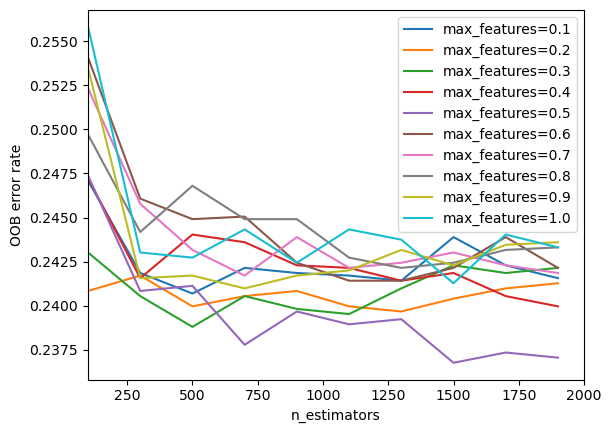

In [39]:
display_oob_error_rate(error_oob, min_estimators, max_estimators)

# Observations sur l'erreur out-of-bag:

On remarque que l'erreur out-of-bag semble plus basse lorsque max_features = 0.5. C'est à dire que les arbres décisionnels ne considèrent que la moitié des variables explicatives lors de chaques coupures.

Concernant n_estimators, le nombre d'arbres d'une forêt, on voit que l'erreur diminue fortement de 100 à environ 500, mais que cette diminution ralentie, voir meme stagne, au delà. 

Afin de confirmer ces deux observations, nous allons augmenter le seuil maximum des valeurs de n_estimators considérées à 5000.

In [40]:
min_estimators = 100
max_estimators = 5000
a_max_features =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
estimators_step=500

In [41]:
error_oob = compute_oob_error_rate(min_estimators, max_estimators, estimators_step, a_max_features)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


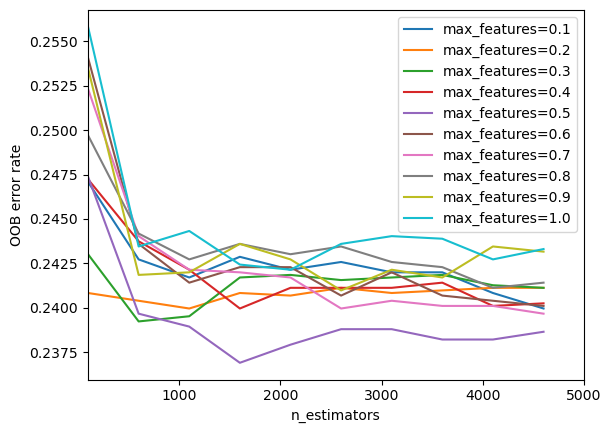

In [44]:
display_oob_error_rate(error_oob, min_estimators, max_estimators)

On voit bien le plateau, il est inutile de continuer au dela de 2000 estimators.

On considèrera donc n_estimators = 1500 et max_features = 0.5

In [6]:
#Librairie pour mesurer le temps d'exécution
import time

Nous allons donc comparer les paramètres par défauts de sci kit (n_estimators = 100, max_features = sqrt(d)) et nos paramètres qui sont censés donner de meilleurs résultats. 
On va retirer le random state pour pouvoir généraliser sur 10 itérations et pour aussi pouvoir mesurer les temps d'apprentissage.

In [ ]:
#RandomForest par défaut
time_start = time.time()
defaults_oob = []
for i in range(1, 11):
    rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)
    defaults_oob.append(rf.oob_score_)
time_end = time.time()
default_time = time_end - time_start

In [ ]:
#RandomForest avec max_features=0.5 et n_estimators=1500
time_start = time.time()
best_oob = []
for i in range(1, 11):
    rf = RandomForestClassifier(oob_score=True, n_estimators=1500, max_features=0.5, n_jobs=-1)
    rf.fit(X_train, y_train)
    best_oob.append(rf.oob_score_)
time_end = time.time()
best_time = time_end - time_start

In [ ]:
print(f"Default RandomForest score: {np.mean(defaults_oob):.3f} en {default_time/10:.2f} secondes en average")
print(f"Best RandomForest score: {np.mean(best_oob):.3f} en {best_time/10:.2f} secondes en average")

Default RandomForest score: 0.753 en 0.35 secondes en average
Best RandomForest score: 0.759 en 20.38 secondes en average


On voit que notre forêt aléatoire prends plus de temps pour l'apprentisssage.

# Mesure d'importance des variables explicatives:

Pour cela, nous allons utiliser la permutation de variables avec la MDA (mean decrease in accuracy).

Ca nous permet de quantifier l'importance des variables pour notre forêt aléatoire.

Les avantages sont que cette démarche est model-agnostic et donc peut s'appliquer a notre forêt aléatoire.

Aussi, elle s'applique plusieurs fois sur chaque variables, ce qui nous donne une meilleure idée de leur importance.

Cela nous permettera d'identifier les variables explicatives le moins corrélées avec notre variable de reponse (winning team).

On utilise notre jeu de donnees de validation pour mesurer l'importance afin de réduire les chances de surapprentissage.

On utilise la MDA plutot que la MDI car celle-ci peut etre biaisé et favorise les variables avec un haute cardinalité.

La permutation de variable peut s'averer couteuse, cependant, nos donnees n'ayant que 96 variables, ce n'est pas un probleme.

On commence donc par entrainer un modele avec nos hytperparametres calibrer et on calcule l'importance des variables par permutation sur notre jeu de donnees de validation:

In [21]:
#MDA par permutation
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, n_jobs=-1)
rf.fit(X_train, y_train)
result = permutation_importance(rf, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
#Sort the features to help with feature selection.
sorted_idx = result.importances_mean.argsort()

NameError: name 'RandomForestClassifier' is not defined

On crée un fonction pour pouvoir visualiser l'importance des variables explicatives:

In [105]:
def plot_feature_importances(importances, names, model_type):
    feature_importances = importances
    feature_names = names

    data={'feature_names':feature_names,'feature_importance':feature_importances}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,20))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')

On observe nos résultats:

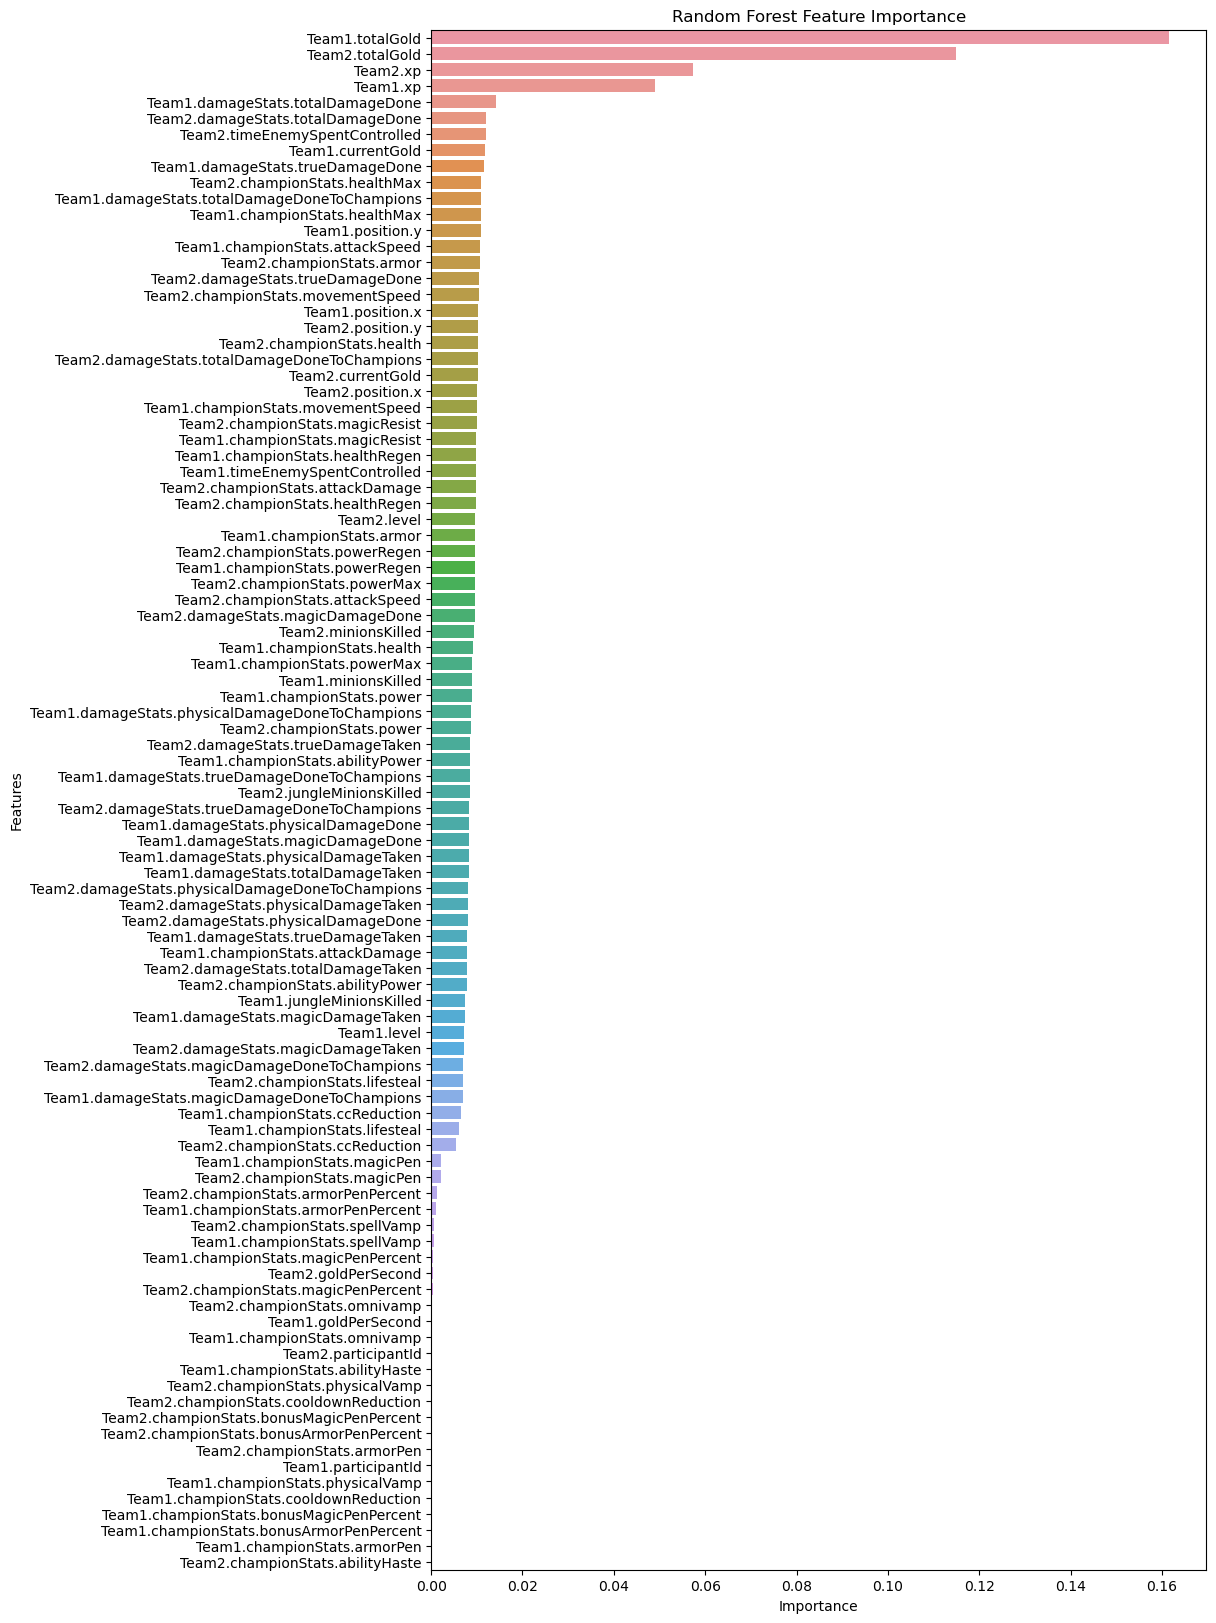

In [106]:
plot_feature_importances(rf.feature_importances_, X_test.columns, 'Random Forest')

# Observations sur l'importance des variables explicatives:

Selon la MDA par permutation, on vois que les golds et l'expérience sont les variables les plus importantes de notre modèle.

Cela semble logique car les golds permettent aux joueurs d'être plus puissant dans la partie et donc de prendre l'avantage sur leurs adveraires.
L'éxperience aussi car avec plus d'éxperience, on peut ameliorer les capacites de notre personnage, ce qui rend ces capacités plus puissantes et donc permette de prendre l'avantage sur les adversaires.

On voit aussi que les 20 dernières variables ne sont pas du tout corrélées avec la victoire. On pourrait dès maintenant les retirer.

# Sélection de variables et impact sur lees perfomances:

On va desormais etudier l'impact de selectionner les variables les plus importantes, notamment sur le temps d'apprentissage/d'inference et sur les performance de generalisation.

Comme dit précédemment on pourrait choisir de supprimer au moins les dernières variables qui servent pour sur à rien à notre modèle, car celles ci peuvent gener l'apprentissage de notre modele, mais on va automatiser la recherche de nombre de variables à retirer optimal pour avoir la meilleure précision. Pour cela on retira 1, puis 2, puis 3, etc... variables de la moins importante à la plus importante pour conserver l'évolution de l'accuracy, du temps d'apprentissage et du temps d'inférence.

In [6]:
accuracys = []
fit_times = []
predict_times = []
for i in range(data.shape[1]):
    #suppression des colonnes de la moins importante à la plus importante selon la MDA faite auparavant
    to_remove = data.columns[sorted_idx[:i]]
    X_train_selected = X_train.drop(columns=to_remove)
    X_test_selected = X_val.drop(columns=to_remove)
    
    rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, n_jobs=-1)
    
    #fit et mesure du temps
    fit_start = time.time()
    rf.fit(X_train_selected, y_train)
    fit_end = time.time()
    
    #predict et mesure du temps
    predict_start = time.time()
    rf.predict(X_test_selected)
    predict_end = time.time()
    
    #ajout aux listes
    fit_times.append(fit_end - fit_start)
    predict_times.append(predict_end - predict_start)
    accuracys.append(cross_val_score(rf, X_test_selected, y_val, cv=3, n_jobs=-1).mean())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


On observe nos resultats de predictions sur notre jeu de donnees test en fonction du nombre de variables explicatives retirées:

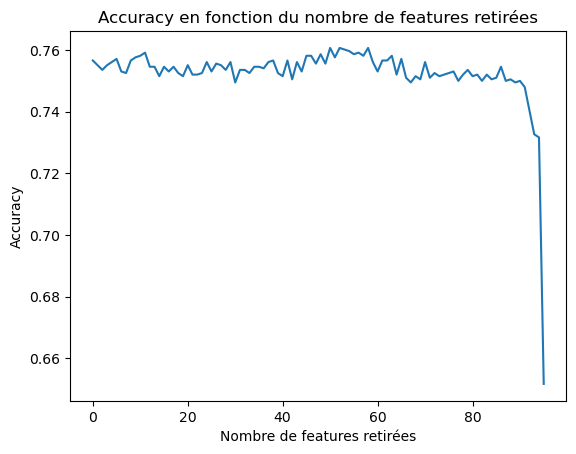

In [7]:
#On affiche le graphe de l'évolution de l'accuracy en fonction du nombre de features gardées
plt.plot(accuracys)
plt.xlabel('Nombre de features retirées')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction du nombre de features retirées')
plt.show()

On observe aussi l'impact sur le temps:

In [114]:
#display des temps
plt.plot(fit_times, label='fit')
plt.plot(predict_times, label='predict')
plt.xlabel('Nombre de features retirées')
plt.ylabel('Temps (s)')
plt.title('Temps en fonction du nombre de features retirées')
plt.legend()
plt.show()

NameError: name 'fit_times' is not defined

# Observations impact sur les performance de la selection de variables explicatives:

Comme pressenti, on voit que l'accuracy est assez constante malgré les suppressions unes à unes des features les moins importantes. 

Cependant, vers 50/60 variables explicatives retirees, on voit que l'on perd environ 0.01 d'accuracy, suivi d'une chute libre de l'accuracy.

On notera l'impact de retirer les 4 variables les plus importantes qu'on observait sur notre plot_features_importances plus haut.

Au regards du temps:

Le temps de fit est décroissant de manière linéaire jusqu'à 60 features retirées suivi d'un plateau.

Le temps d'inférence semble être constant, donc on ne le prend pas en compte dans notre choix de features à retirer.


On aurait donc envie de créer un bon équilibre entre l'accuracy et le temps d'apprentissage.

Notre choix est donc de retirer les 55 features les plus inutiles. Cela conservera l'accuracy tout en passant de 20s d'apprentissage à ~5s

Notre choix etant fait, nous allons approfondir la comparaison des performances entre un modele sans selection de variables, et un autre modele avec.

Nous allons faire ceci en moyennant nos prévisions sur plusieurs itérations afin de comparer les accuracys et les temps de calcul.

On commence donc par creer des jeux de donnees avec la selection de variable:

In [117]:
to_remove = data.columns[sorted_idx[:55]]
X_train_selected = X_train.drop(columns=to_remove)
X_test_selected = X_test.drop(columns=to_remove)

Comparaison du temps d'apprentissage sur 10 iterations:

In [118]:
train_time_selected = 0
train_time = 0
for i in range(10):
    rf_selected = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
    rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)

    train_time_start_selected = time.time() 
    rf_selected.fit(X_train_selected, y_train)
    train_time_end_selected = time.time()

    train_time_start = time.time()
    rf.fit(X_train, y_train)
    train_time_end = time.time()

    train_time_selected += train_time_end_selected - train_time_start_selected
    train_time += train_time_end - train_time_start

In [120]:
print(f"Temps d'apprentissage avec selection de variables explicatives: {train_time_selected/10:.2f} secondes en moyenne")
print(f"Temps d'apprentissage sans selection de variables explicatives: {train_time/10:.2f} secondes en moyenne")
print(f"L'apprentissage avec selection de variables explicatives se fait en {100*train_time_selected/train_time:.2f} % du temps d'apprentissage sans selection de variables explicatives." )

Temps d'apprentissage avec selection de variables explicatives: 9.89 secondes en moyenne
Temps d'apprentissage sans selection de variables explicatives: 19.74 secondes en moyenne
L'apprentissage avec selection de variables explicatives se fait en 50.08 % du temps d'apprentissage sans selection de variables explicatives.


Ensuite on compare le temps d'inference des deux forets aleatoires en moyennant sur 100 iterations:

In [115]:
rf_selected = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf_selected.fit(X_train_selected, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=1500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [116]:
predict_time_selected = 0
predict_time = 0

for i in range(100):

    predict_time_start_selected = time.time()
    rf_selected.predict(X_test_selected)
    predict_time_end_selected = time.time()

    predict_time_start = time.time()
    rf.predict(X_test)
    predict_time_end = time.time()

    predict_time_selected += predict_time_end_selected - predict_time_start_selected
    predict_time += predict_time_end - predict_time_start

NameError: name 'X_test_selected' is not defined

In [39]:
print(f"Temps d'apprentissage avec selection de variables explicatives: {predict_time_selected/10:.2f} secondes en moyenne")
print(f"Temps d'apprentissage sans selection de variables explicatives: {predict_time/10:.2f} secondes en moyenne")
print(f"L'apprentissage avec selection de variables explicatives se fait en {100*predict_time_selected/predict_time:.2f} % du temps d'apprentissage sans selection de variables explicatives." )

Temps d'apprentissage avec selection de variables explicatives: 4.01 secondes en moyenne
Temps d'apprentissage sans selection de variables explicatives: 4.04 secondes en moyenne
L'apprentissage avec selection de variables explicatives se fait en 99.26 % du temps d'apprentissage sans selection de variables explicatives.


Comparaison des performances de generalisation sur notre jeu de donnees test:

In [40]:
rf_selected = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf = RandomForestClassifier(n_estimators=1500, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf_selected.fit(X_train_selected, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=1500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [48]:
score_select = cross_val_score(rf_selected, X_test_selected, y_test, scoring="accuracy", cv = 10)
score = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv = 10)

[0.8071066  0.7715736  0.77664975 0.74111675 0.76020408 0.7244898
 0.75510204 0.69387755 0.7244898  0.80102041] [0.78172589 0.77664975 0.75634518 0.75634518 0.75510204 0.77040816
 0.73979592 0.71938776 0.73469388 0.78571429]


In [57]:
print(f"Precision avec selection de variable: {score_select.mean():.2f}")
print(f"Precision sans selection de variable: {score.mean():.2f}")

Precision avec selection de variable: 0.76
Precision sans selection de variable: 0.76


# Conclusion:

On voit qu'en selectionnant les variables explicatives les plus importantes, on garde de bonne performances sur notre jeu de donnees test, tout en ayant un gain de temps non negligeable durant l'apprentissage.

# FIN ^^